In [4]:
# region ----------Imports ----------
from NeuralNetwork import NeuralNetwork
import time
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import seaborn as sns
from IPython.display import display, clear_output
import itertools
#endregion

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Method to sort the experiment files numerically
def numerical_sort(value):
    parts = re.split(r'(\d+)', value)
    return [int(part) if part.isdigit() else part for part in parts]

# Function to plot heatmaps for each layer
def plot_weights(weights):
    num_layers = len(weights)
    fig, axes = plt.subplots(1, num_layers, figsize=(15, 5))

    for i in range(num_layers):
        ax = axes[i]
        sns.color_palette("light:#5A9", as_cmap=True)
        sns.heatmap(weights[i], ax=ax, annot=False)
        ax.set_title(f'Layer {i + 1}')

    plt.tight_layout()
    plt.show()
    
    clear_output(wait=True)  # Clear the previous output in the notebook
    display(fig)  # Display the updated plot
    plt.close(fig)  # Close the figure to avoid duplicate display
    return ax

folder = "experiment_data"
subfolders = sorted(os.listdir(folder),key=numerical_sort)
num_exp = len(subfolders)
selected_games_per_gen = 100 # Selected baselines per generation to be used as references for mutations


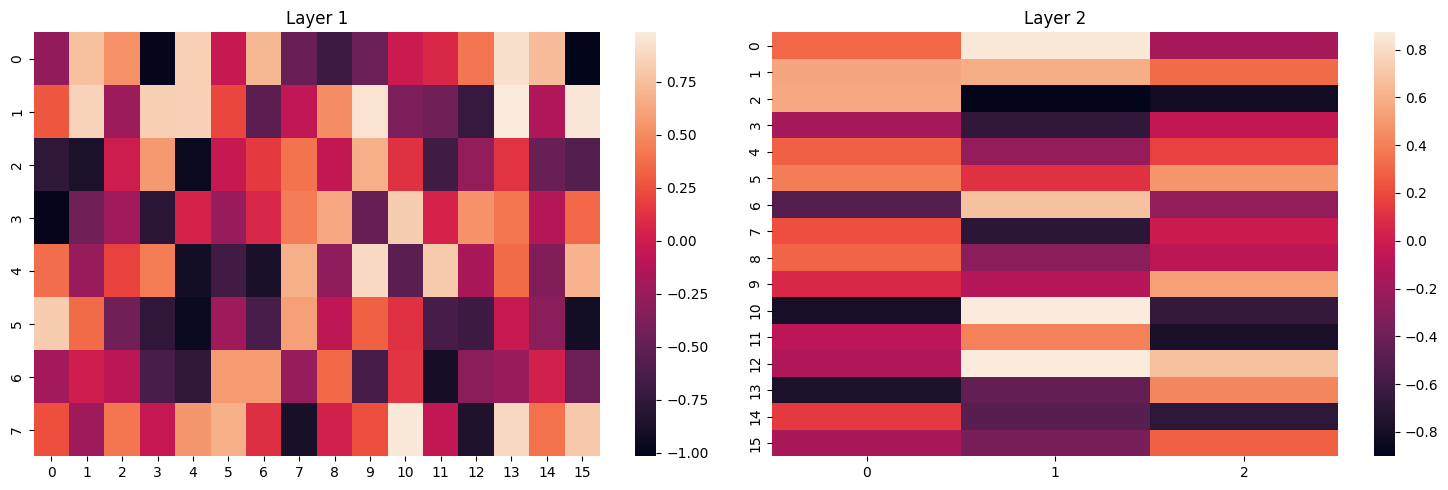

Gen_1
Subfolder: Gen_1 - Euclidean distance: 10.975857964214217


KeyboardInterrupt: 

In [7]:
for subfolder in subfolders:
    files = sorted(os.listdir(os.path.join(folder, subfolder)), key=numerical_sort)
    weights, biases = list(), list()
    for i, file in enumerate(files):
        if i > selected_games_per_gen:
            break        
        try:
            data = np.load(os.path.join(folder, subfolder, file), allow_pickle=True)
            weights.append(data['weights'])
            biases.append(data['biases'])
               
        except Exception as e:
            print("ERROR")         
         
    # Plot just the best performing DNA
    plot_weights(weights[0])
    print(f"{subfolder}")  
        
    # Calculate diversity in curr. generation (Euclidean distance)
    
    # Create a flattened representation of all individuals "DNA"
    # which includes the weights and biases of all layers
    ind_dna_list = list()
    for i, (ind_w, ind_b) in enumerate(zip(weights, biases)):
        ind_dna = np.array([])
        for layer_w, layer_b in zip(ind_w, ind_b):
            ind_dna = np.concat([ind_dna, layer_w.flatten(), layer_b.flatten()])    
        ind_dna_list.append(ind_dna)
     
    # Calculate the avg. distances between all DNAs (pairwise Euclidean distances)
    ind_dna_list_np = np.vstack(ind_dna_list)
      
    sum_dist, pair_count = 0, 0
    for comb in itertools.combinations(ind_dna_list_np, 2):
        # Euclidean distance between the two individuals in the combination
        dist = euclidean_distance(comb[0], comb[1]) # Sum of squared differences
        sum_dist += dist
        pair_count += 1

    # Calculate the average distance
    avg_dist = sum_dist / pair_count
    print(f"Subfolder: {subfolder} - Euclidean distance: {avg_dist}")  
    